In [1]:
from obspy.taup import plot_travel_times
import matplotlib.pyplot as plt
from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime
import pandas as pd
from obspy.taup import TauPyModel

There were 0 epicentral distances without an arrival


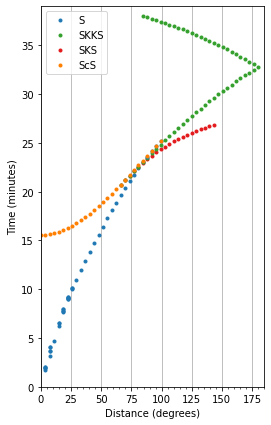

In [12]:
fig, ax = plt.subplots(figsize=(4, 7))
ax = plot_travel_times(source_depth=10,
                       ax=ax, fig=fig, verbose=True,phase_list=['S','ScS','SKS','SKKS'])
# fig.savefig('/Volumes/home/06_NTU_thesis/03_figure/SKS_TravelTime_curve.png',dpi=150)
# fig.savefig('/Volumes/home/06_NTU_thesis/03_figure/SKS_TravelTime_curve.pdf')

## 2010-2015/10

In [4]:
client = Client("IRIS")
# t1 = UTCDateTime("2010-10-01T00:00:00")
t1 = UTCDateTime("2010-10-01T01:00:00")
t2 = UTCDateTime("2015-09-30T01:00:00")
Cata= client.get_events(starttime=t1, endtime=t2, minmagnitude=7,latitude =41.115,longitude=43.8036,
                        minradius=100,maxradius=145,maxdepth=1000,orderby='time-asc')
len(Cata)

44

## 2015/10-2021/06/30

In [14]:
client = Client("IRIS")
# t1 = UTCDateTime("2010-10-01T00:00:00")
t1 = UTCDateTime("2015-10-01T00:00:00")
t2 = UTCDateTime("2021-06-30T23:59:59")
Cata= client.get_events(starttime=t1, endtime=t2, minmagnitude=6,latitude =41.115,longitude=43.8036,
                        minradius=80,maxradius=155,orderby='time-asc')
# len(Cata)

In [16]:
frame={'Time':[],'Lon':[],"Lat":[],'Mag':[],"Depth":[],"Description":[]}
for cat in Cata:
    time=v=cat.origins[0].time
    lon=cat.origins[0].longitude
    lat=cat.origins[0].latitude
    mag=cat.magnitudes[0].mag
    depth=cat.origins[0].depth
    description=cat.event_descriptions[0].text
    frame['Time'].append(time)
    frame['Lon'].append(lon)
    frame['Lat'].append(lat)
    frame['Mag'].append(mag)
    frame['Depth'].append(depth)
    frame['Description'].append(description)
    

In [17]:
Catalog=pd.DataFrame(data=frame)
Data_path='/Volumes/home/Research/DataBase'
Catalog.to_csv(f'{Data_path}/Earthquake_4SKS_2015-2021.txt',sep='\t', index=False)
Catalog.to_csv(f'{Data_path}/Earthquake_4SKS_2015-2021.csv', index=False)